<a href="https://colab.research.google.com/github/Goku-4014/Machine_Learning/blob/main/neural_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INtroduction to neural network clasification with tensorflow
 binary classification
 multiclass classification
 multilabel classification




In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## creating datat to view and fit
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples,
                         noise = 0.03,
                         random_state = 42)



In [ ]:
import pandas as pd
from sklearn.datasets import make_circles

# Generate the dataset
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

# Create a DataFrame
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles
# Display the first few rows of the DataFrame
# print(circles.head())

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


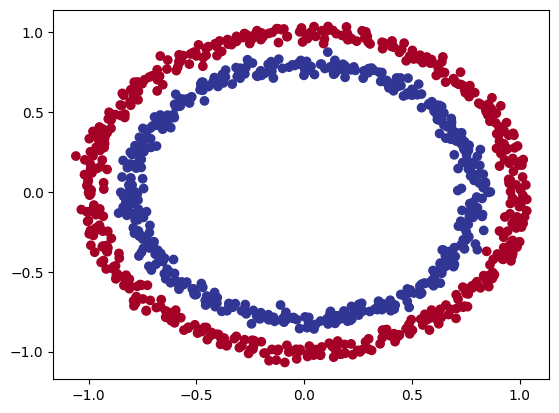

In [ ]:
## visualize

plt.scatter(X[:,0], X[:,1], c=y, cmap =plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

*modelling*
1. Create a model
2. compile the model
3.fit the model
4. evaluate the model
5. Tweak the model
6. Evaluate


In [ ]:
## creating a model
tf.random.set_seed(42)

 # createa a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


## compile the model

model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

## fit the model
model.fit(X, y, epochs = 100, verbose =0)

In [ ]:
model.fit(X, y, epochs = 200, verbose =0)

In [ ]:
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.4686e-04


[0.00025616437778808177, 1.0]

In [ ]:
import numpy as np

plot decision boundary


In [ ]:
def plot_decision_boundary(model, X, y):
  #define the axis boundaries of the plot and create a meshgrid
  x_min, x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max=X[:,1].min()-0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  ## create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]


  ## make predictions
  y_pred = model.predict(x_in)

  ## check for multiclass
  if len(y_pred[0]) >1:
    print("doing multi class classificaiton")
     # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)


    #plot the decision boundary

    plt.contourf(xx,yy, y_pred, cmap = plt.cm.RdYlBu, alpha =0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification


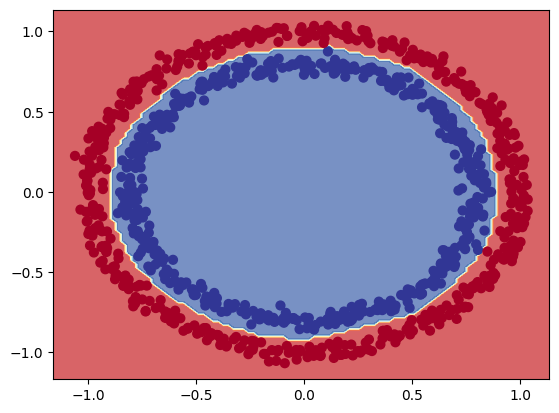

In [ ]:
 # check out the prediction our model is making

 plot_decision_boundary(model = model, X = X, y = y)

In [ ]:
## let's see if our model can be used for regression problems

tf.random.set_seed(42)

# create some regression data

X_regression = np.arange(0,1000,5)
y_regression = np.arange(100, 1100,5)

 ## splitting data

x_reg_train = X_regression[:150]
y_reg_train = y_regression[:150]

x_reg_test = X_regression[150:]
y_reg_test = y_regression[150:]


## fit modelm
# model.fit(x_reg_train, y_reg_train, epochs = 100, verbose =0)

In [ ]:
 ## changing the model for regeression problema

tf.random.set_seed(42)

# creat

model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

## compile the model

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

## fit the model
model_2.fit(tf.expand_dims(x_reg_train, axis=1), y_reg_train, epochs = 100, verbose =1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 454.5012 - mae: 454.5012
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.2922 - mae: 372.2922 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 289.4946 - mae: 289.4946 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204.5777 - mae: 204.5777 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.8197 - mae: 115.8197 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.3073 - mae: 43.3073 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.1102 - mae: 69.1102 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.4286 - mae: 68.4286 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.3279 - mae: 48.3279 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.4311 - mae: 43.4311 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.7612 - mae: 43.7612 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.6539 - mae: 40.6539 
Epoch 13/100
5/

In [ ]:
# make predictions without train model

y_reg_preds = model_2.predict(tf.expand_dims(x_reg_test, axis =1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


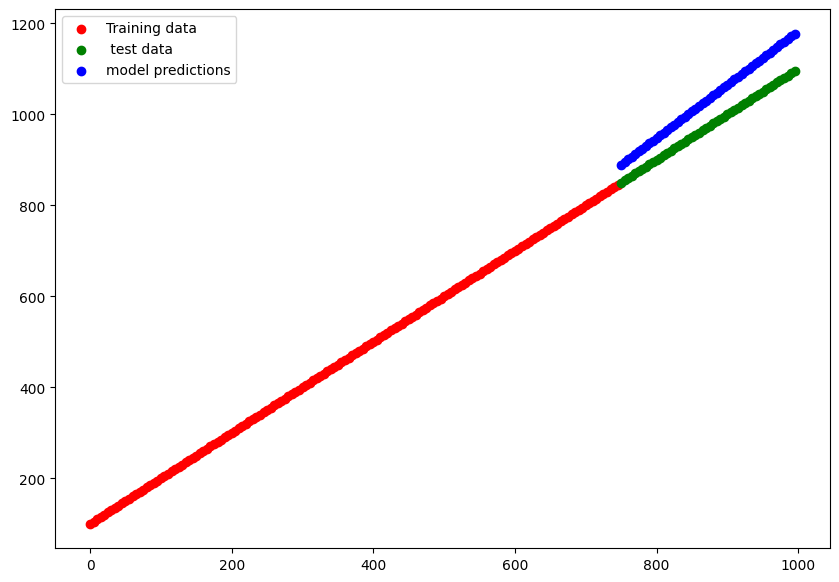

In [ ]:
##plots the model prediction against out regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c = "r", label = "Training data")
plt.scatter(x_reg_test, y_reg_test, c = "g", label = " test data")

plt.scatter(x_reg_test, y_reg_preds, c = "b", label = "model predictions")
plt.legend()

working with non linearities


In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A



<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

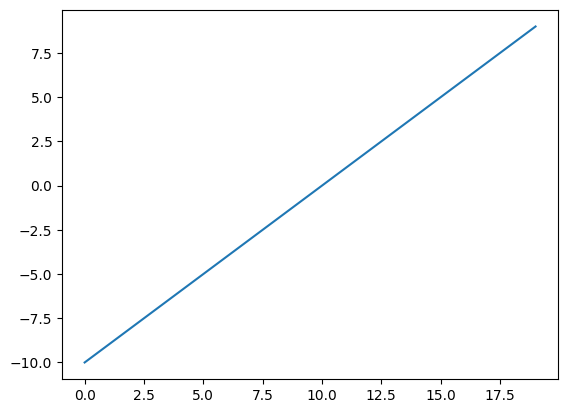

In [ ]:
plt.plot(A)

In [ ]:
## sigmoid function
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

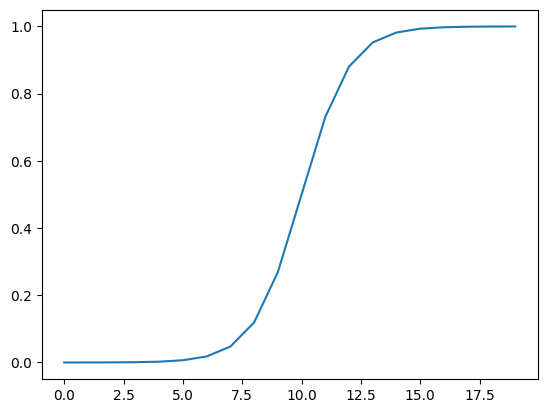

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
len(X)

1000

In [ ]:
X_train, Y_train = X[:800], y[:800]
X_test, Y_test = X[800:], y[800:]

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
## creating a new model

tf.random.set_seed(42)

# creating a model as befor
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

## compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
    metrics = ["accuracy"]
)

## fit the model
history = model_3.fit(X_train, Y_train, epochs = 50, verbose =1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4818 - loss: 0.7077
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4633 - loss: 0.6949  
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 0.6906 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5153 - loss: 0.6876 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5346 - loss: 0.6783 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5492 - loss: 0.6674 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5598 - loss: 0.6568 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 0.6445 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6007 - loss: 0.6359 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6202 - loss: 0.6243 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.6157 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

In [ ]:
#3 evaluating the model
model_3.evaluate(X_test, Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9842 - loss: 0.0481


[0.04201696813106537, 0.9900000095367432]

In [ ]:
Y_preds = model_3.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (32, 4)                     │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (32, 4)                     │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (32, 1)                     │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


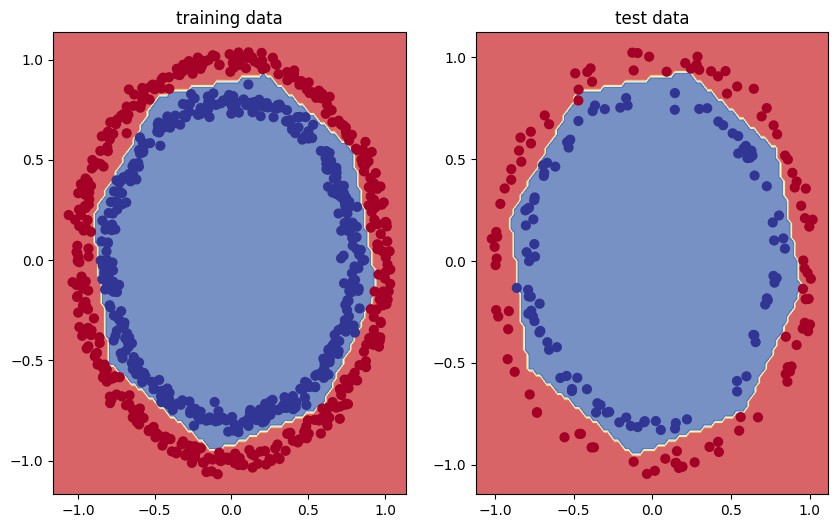

In [ ]:
## plot he decision boundaries for the tarining and test sets

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("training data")
plot_decision_boundary(model_3, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_3, X_test, Y_test)
plt.show()

In [ ]:
## plot the loss or training cureve


In [ ]:
## convert the history object into a data frame

pd.DataFrame(history.history)

,accuracy,loss
0,0.48750,0.700011
1,0.46625,0.691570
2,0.51875,0.686702
3,0.54375,0.680753
4,0.56750,0.671003
5,0.58500,0.659463
6,0.60875,0.647054
7,0.62250,0.634055
8,0.63500,0.623255
9,0.64875,0.611822


<Axes: >

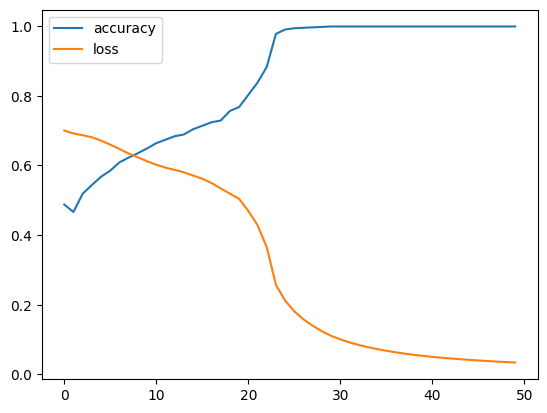

In [ ]:
pd.DataFrame(history.history).plot()

Finding the best leraning Rate for our model by creating a function


In [ ]:
## call back function for learning rate


tf.random.set_seed(42)
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])


model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

## create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


## fit the  model ( passing the lr_scheduler call back)

history_1 = model_4.fit(X_train, Y_train, epochs =100, callbacks =[lr_scheduler], verbose =1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4905 - loss: 0.7105 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4805 - loss: 0.7087 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4922 - loss: 0.7069 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4985 - loss: 0.7050 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5058 - loss: 0.7029 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.7009 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5012 - loss: 0.6988 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4943 - loss: 0.6968 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4977 - loss: 0.6948 - learning_

<Axes: xlabel='epochs'>

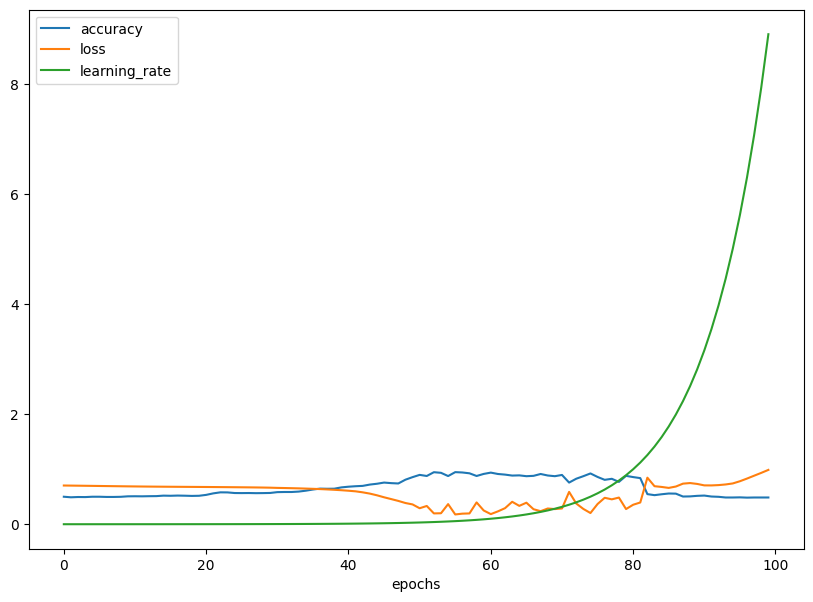

In [ ]:
pd.DataFrame(history_1.history).plot(figsize = (10,7), xlabel ="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

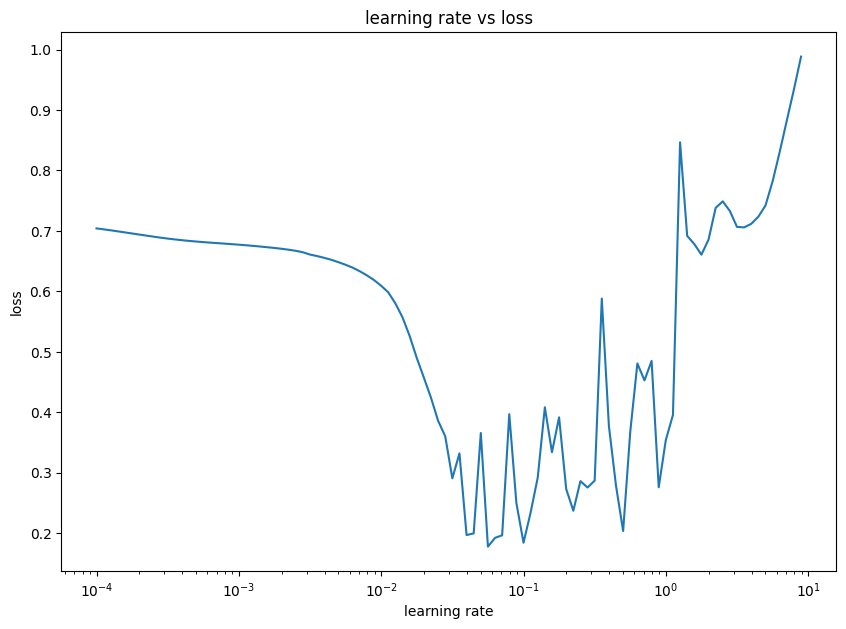

In [ ]:
## plot the learning rate vc loss

lrs =1e-4*(10**(tf.range(100)/(20)))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, tf.round(model_3.predict(X_test)))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.98989898989899

In [ ]:
## condusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, tf.round(model_3.predict(X_test)))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[100,   1],
       [  1,  98]])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


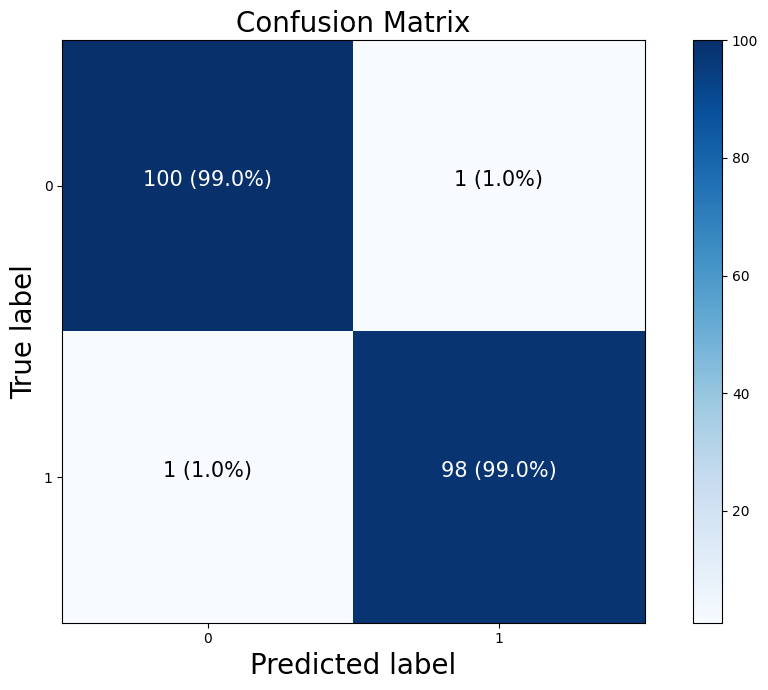

In [ ]:
from functools import cmp_to_key
## pretifying our confusion matrix


import itertools

figsize =(10,7)


# create confusionmatrix

cm = confusion_matrix(Y_test, tf.round(model_3.predict(X_test)))

# normalize the confusion matrix
cm_norm = cm.astype("float")/cm.sum(axis =1)[:, np.newaxis]

n_classes = cm.shape[0]


fig,ax = plt.subplots(figsize = figsize)
## create a matrix plot
cax = ax.matshow(cm, cmap =plt.cm.Blues)
fig.colorbar(cax)


# creata classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

  # label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

plt.tight_layout()
plt.show()



Working with larger examples set
multiclass classification


In [ ]:
import tensorflow as tf
from  tensorflow.keras.datasets import fashion_mnist


In [ ]:
(train_data, train_labels), (test_data, test_lables) = fashion_mnist.load_data()

In [ ]:
## how first training example

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

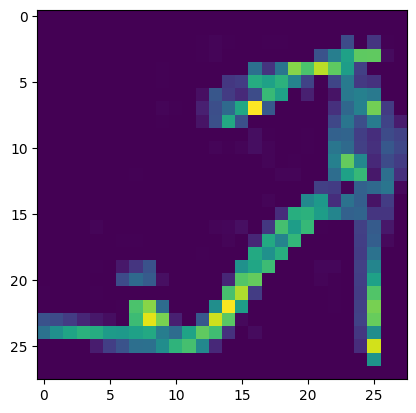

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[8])

In [ ]:
# check out sample lables
train_labels[8]

5

In [ ]:
## create a small list so we can index onto out training lables so they are human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

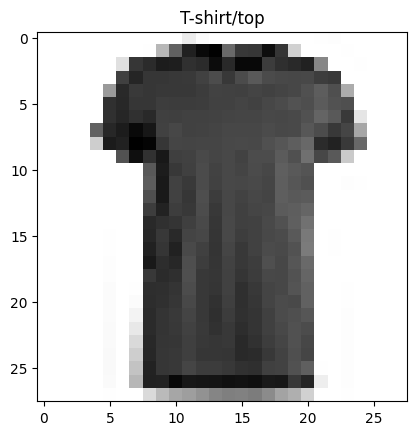

In [ ]:
##plot an example image and its lables
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

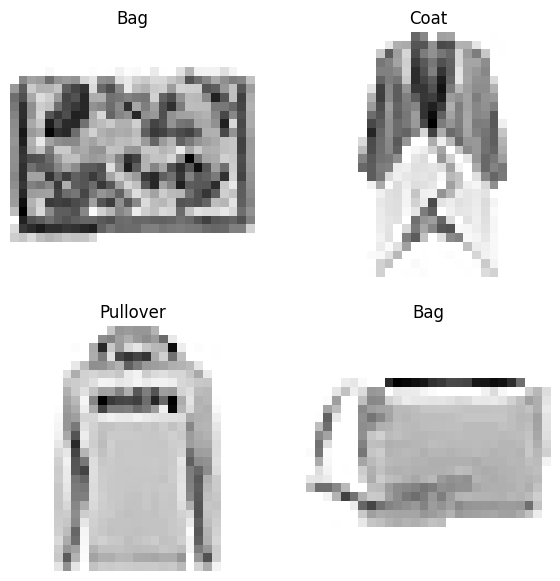

In [ ]:
## plot multiple randomm images of data set

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap =plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi class classification model
for our multi class classification model, we can use a similar architecture to do things:
* input shape = 28 x28 (shape of image)
* output shape = 10( one per class of clothing)

* loss function = tf.keras.losses.CategoricalCrossEntropy()

* outplut layer activation = softmax


In [ ]:
# set random seed
tf.random.set_seed(42)

 ## create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

## compile the model

model_5.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


## fit  the model
non_norm_history = model_5.fit(train_data, tf.one_hot(train_labels, depth =10), epochs =10, validation_data =(test_data, tf.one_hot(test_lables, depth =10)))




Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0972 - loss: 2.6443 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0984 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1585 - loss: 2.1025 - val_accuracy: 0.2382 - val_loss: 1.7445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2634 - loss: 1.7158 - val_accuracy: 0.3011 - val_loss: 1.6076
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2950 - loss: 1.6024 - val_accuracy: 0.3110 - val_loss: 1.5595
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3069 - loss: 1.5604 - val_accurac

In [ ]:
model_5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
## check the min and max alues of the data
train_data.min(), train_data.max()

(0, 255)

neural networks prefer data to be scaled (or normalized), this mean they like to have the numbers in tensors or in between 0 and 1



In [ ]:
## we can get out training data and testing data in 0 and 1 by dividing my maximum

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
train_data_norm.min()

0.0

In [ ]:
### model for normalized data set

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

## compile the mdoel
model_6.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

## fit the model

norm_history = model_6.fit(train_data_norm, train_labels, epochs =10, validation_data =(test_data_norm, test_lables))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3746 - loss: 1.6153 - val_accuracy: 0.6816 - val_loss: 0.8162
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6951 - loss: 0.7684 - val_accuracy: 0.7324 - val_loss: 0.6780
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7653 - loss: 0.6297 - val_accuracy: 0.7818 - val_loss: 0.6064
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7954 - loss: 0.5736 - val_accuracy: 0.7940 - val_loss: 0.5857
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8027 - loss: 0.5545 - val_accuracy: 0.8003 - val_loss: 0.5754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8089 - loss: 0.5429 - val_accuracy: 0.8050 - val_loss: 0.5679
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8133 - loss: 0.5343 - val_accuracy: 0.8090 - val_loss: 0.5624
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8176 - loss: 0.5274 - 

<Axes: title={'center': 'non_normalised'}>

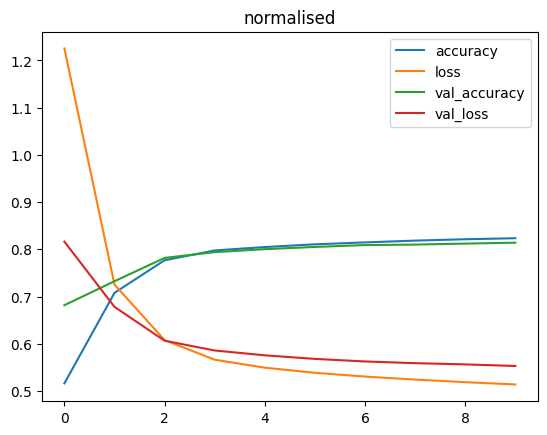

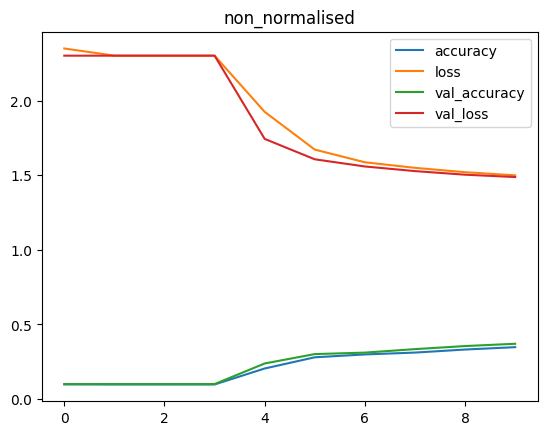

In [ ]:
### accuracy comparision with normalized data and non normalised data

import pandas as pd
pd.DataFrame(norm_history.history).plot(title ="normalised")
pd.DataFrame(non_norm_history.history).plot(title ="non_normalised")

In [ ]:
##  careting a model to find the the ideal learning rate

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
    ])

## compiling the model

model_7.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

## Creatinng the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# fittinh the model

find_lr_history = model_7.fit(train_data_norm, train_labels, epochs =40, callbacks =[lr_scheduler], verbose =1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4173 - loss: 1.4809 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6931 - loss: 0.7897 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7263 - loss: 0.7285 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7411 - loss: 0.6948 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7504 - loss: 0.6720 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7612 - loss: 0.6535 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7688 - loss: 0.6389 - learning_rate: 0.0020
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7791 - loss: 0.6214 - learning_rate: 0.0022
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7864 - loss: 0.6068 - learning_rate:

Text(0.5, 1.0, 'learning rate vs loss')

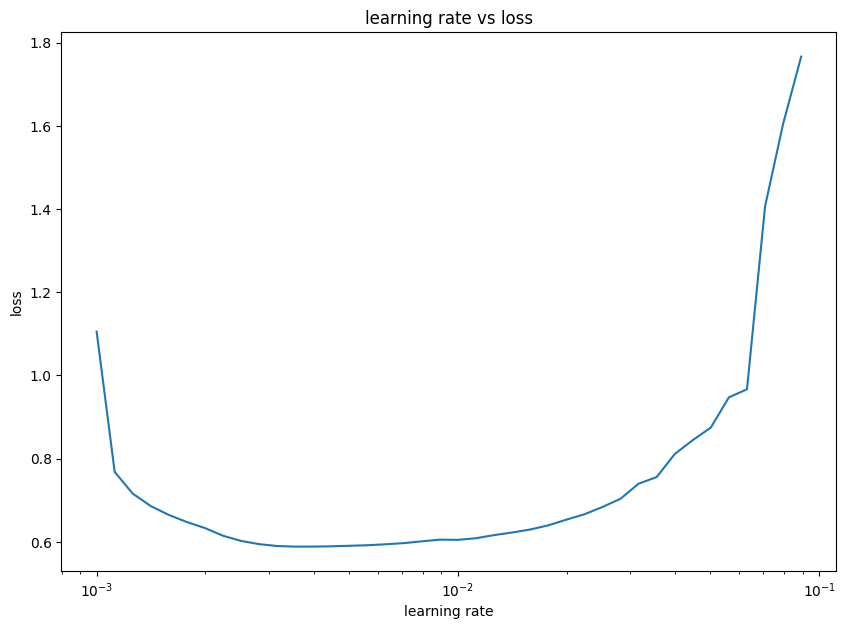

In [ ]:
## plotting the learning rate  decay curve

import numpy as np
import matplotlib.pyplot as plt
lrs =1e-3*(10**(np.arange(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [ ]:
## let creates model using ideal learning rate
tf.random.set_seed(42)

# new model_8

model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

## compile the model

model_8.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate =0.003),
    metrics = ["accuracy"]
)

## fitting the model

model_8.fit(train_data_norm, train_labels, epochs =20, validation_data =(test_data_norm, test_lables))



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4515 - loss: 1.4037 - val_accuracy: 0.6792 - val_loss: 0.8423
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7030 - loss: 0.8014 - val_accuracy: 0.7209 - val_loss: 0.7715
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7296 - loss: 0.7480 - val_accuracy: 0.7279 - val_loss: 0.7485
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7408 - loss: 0.7237 - val_accuracy: 0.7350 - val_loss: 0.7299
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7475 - loss: 0.7086 - val_accuracy: 0.7455 - val_loss: 0.7190
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7521 - loss: 0.6966 - val_accuracy: 0.7488 - val_loss: 0.7082
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7551 - loss: 0.6885 - val_accuracy: 0.7542 - val_loss: 0.7026
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7578 - loss: 0.6821 - 

In [ ]:
### creating a confusion matrix

import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


def make_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis =1)[:, np.newaxis]
  n_classes = cm.shape[0]


  ## plot the figure and make it pretty
  fig, ax, plt.subplots(figsize =figsize)
  cax = ax.matshow(cm, cmap =plt.cm.Blues)
  fig.colorbar(cax)


  # are there a lsit of classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [ ]:
## making predictions with the most recent model

y_probs = model_8.predict(test_data_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_probs[:5]

array([[2.37693275e-05, 3.09876268e-05, 4.61680969e-08, 6.39989332e-04,
        3.18277648e-06, 2.85150498e-01, 6.25877074e-05, 9.43169966e-02,
        3.77022452e-03, 6.16001725e-01],
       [2.17742985e-03, 3.51779121e-08, 9.64318991e-01, 2.60543820e-05,
        1.70028824e-02, 0.00000000e+00, 1.64745897e-02, 0.00000000e+00,
        5.06968729e-12, 0.00000000e+00],
       [1.70944503e-03, 9.97139096e-01, 3.16839708e-13, 1.15128688e-03,
        4.30449593e-10, 0.00000000e+00, 2.00247072e-07, 3.31175523e-24,
        3.54564365e-16, 1.85592032e-39],
       [4.49219253e-04, 9.98984158e-01, 1.21407214e-14, 5.66648087e-04,
        4.59573074e-11, 0.00000000e+00, 2.99199847e-08, 1.31614048e-20,
        1.51015757e-16, 4.55450215e-36],
       [9.40764099e-02, 1.10005079e-04, 4.97477740e-01, 3.44421552e-03,
        1.83227342e-02, 3.15561989e-37, 3.86395872e-01, 2.65271520e-26,
        1.73017979e-04, 9.43130301e-28]], dtype=float32)

In [ ]:
## now for all the lables

## convert all the predcitons from probabilities to labels
y_preds = y_probs.argmax(axis =1)

y_preds[:5]

array([9, 2, 1, 1, 2])

In [ ]:
## see the predicted class number and albel for the first example

y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:


## check out the non- prettified confusionm atrix

from sklearn.metrics import confusion_matrix
confusion_matrix(test_lables, y_preds)

array([[815,   5,  29,  47,   2,   2,  85,   1,  14,   0],
       [ 22, 925,   2,  38,   2,   0,   8,   2,   1,   0],
       [ 27,   1, 727,   8, 101,   0, 130,   0,   6,   0],
       [ 48,  30,  14, 793,  41,   1,  69,   0,   4,   0],
       [  3,   0, 210,  42, 636,   0, 104,   0,   5,   0],
       [  0,   0,   0,   1,   0, 824,   0,  23,  32, 120],
       [199,   1, 166,  38, 120,   0, 457,   0,  19,   0],
       [  0,   0,   0,   0,   0,  15,   0, 844,   1, 140],
       [  3,   0,   3,  12,   3,  26,  55,   5, 891,   2],
       [  0,   0,   0,   0,   0,  99,   0, 197,   3, 701]])

In [ ]:
#### make a prettier confusion matrix

# make_matrix(test_lables, y_preds, classes =class_names, figsize =(15,15), textsize =10)

TypeError: make_matrix() got an unexpected keyword argument 'textsize'

In [ ]:
## now plotting the random image with its predictins
import random

def plot_random_image(model, images, true_lables, classes):
   #setup the random integer
   i = random.randint(0, len(images))

   # create the predictions and targets
   target_image = images[i]
   pred_probs = model.predict(target_image.reshape(1,28,28))
   pred_label = class_names[pred_probs.argmax()]
   true_label = class_names[true_lables[i]]

   # plot the target image
   plt.imshow(target_image, cmap =plt.cm.binary)

   # change the colout of titles  depending on predictions

   if pred_label == true_label:
     color = "green"
   else:
     color = "red"


   plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


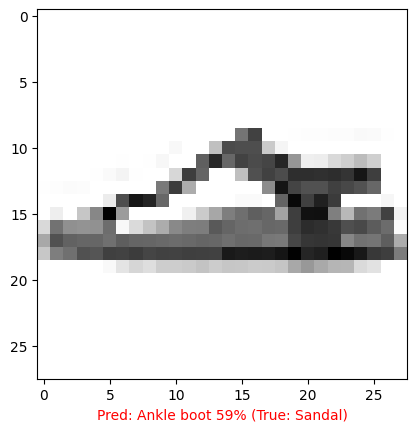

In [ ]:
# check_out the  random image as well as predictions
plot_random_image(model_8, test_data_norm, test_lables, class_names)